<a href="https://colab.research.google.com/github/yascarraro/analise-acoes-python/blob/main/imersaopython2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imersão Python Alura - Aula 4 - Gráficos Candlesticks

In [ ]:
!pip install mplfinance
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import mplfinance as mpf
import yfinance as yf
import plotly.graph_objects as go
from plotly.subplots import make_subplots

## PETR4

In [ ]:
dados = yf.download('PETR4.SA',start='2023-01-01', end='2023-12-31')
dados

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-02,23.540001,23.809999,22.799999,22.920000,17.709478,78424700
2023-01-03,22.940001,23.100000,22.129999,22.340000,17.261332,96750300
2023-01-04,21.959999,23.590000,21.830000,23.049999,17.809923,129504000
2023-01-05,23.340000,24.040001,23.150000,23.879999,18.451235,73886000
2023-01-06,23.940001,24.320000,23.549999,23.740000,18.343061,51851500
...,...,...,...,...,...,...
2023-12-21,36.669998,36.680000,36.070000,36.389999,36.389999,30511900
2023-12-22,36.500000,36.799999,36.369999,36.740002,36.740002,31234700
2023-12-26,36.860001,37.369999,36.830002,37.330002,37.330002,23466800


In [ ]:
dados.columns = ['Aber', 'Max', 'Min', 'Fech', 'Ajuste', 'Volume']
dados = dados.rename_axis('Data')
dados

,Aber,Max,Min,Fech,Ajuste,Volume
Data,,,,,,
2023-01-02,23.540001,23.809999,22.799999,22.920000,17.709478,78424700
2023-01-03,22.940001,23.100000,22.129999,22.340000,17.261332,96750300
2023-01-04,21.959999,23.590000,21.830000,23.049999,17.809923,129504000
2023-01-05,23.340000,24.040001,23.150000,23.879999,18.451235,73886000
2023-01-06,23.940001,24.320000,23.549999,23.740000,18.343061,51851500
...,...,...,...,...,...,...
2023-12-21,36.669998,36.680000,36.070000,36.389999,36.389999,30511900
2023-12-22,36.500000,36.799999,36.369999,36.740002,36.740002,31234700
2023-12-26,36.860001,37.369999,36.830002,37.330002,37.330002,23466800


### Matplotlib linhas

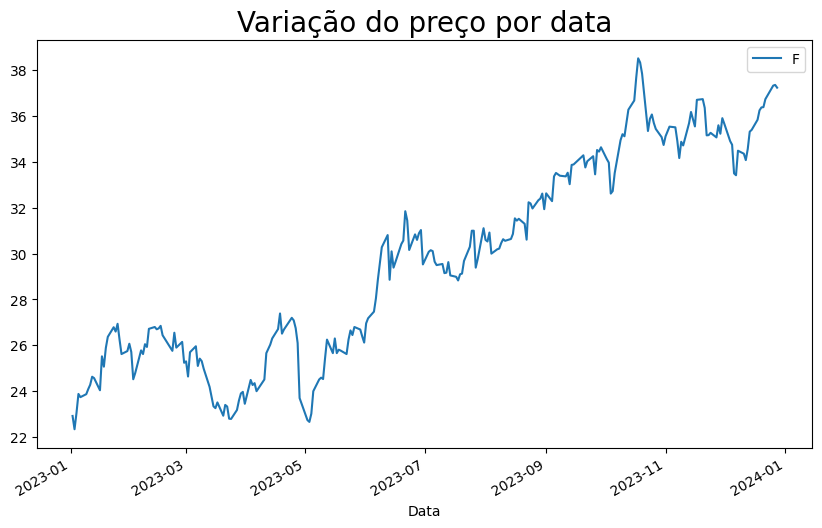

In [ ]:
dados['Fech'].plot(figsize=(10,6))
plt.title('Variação do preço por data', fontsize=20)
plt.legend('Fechamento')

### Matplotlib candles

In [ ]:
df=dados.head(60).copy()
df['Data'] = df.index
df['Data'] = df['Data'].apply(mdates.date2num)
df.head(5)

,Aber,Max,Min,Fech,Ajuste,Volume,Data
Data,,,,,,,
2023-01-02,23.540001,23.809999,22.799999,22.920000,17.709478,78424700,19359.0
2023-01-03,22.940001,23.100000,22.129999,22.340000,17.261332,96750300,19360.0
2023-01-04,21.959999,23.590000,21.830000,23.049999,17.809923,129504000,19361.0
2023-01-05,23.340000,24.040001,23.150000,23.879999,18.451235,73886000,19362.0
2023-01-06,23.940001,24.320000,23.549999,23.740000,18.343061,51851500,19363.0


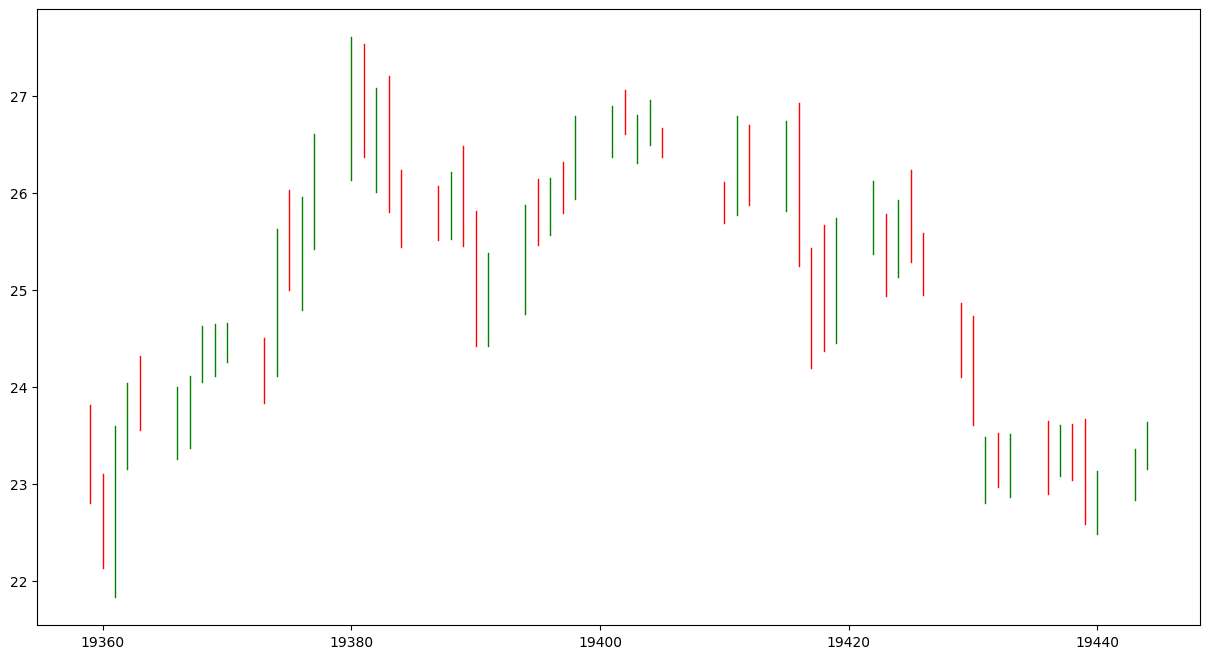

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))
width = 0.7

for i in range(len(df)):
    if df['Fech'].iloc[i] > df['Aber'].iloc[i]:
        color = 'green'
    else:
        color = 'red'


    ax.plot([df['Data'].iloc[i], df['Data'].iloc[i]],
            [df['Min'].iloc[i], df['Max'].iloc[i]],
            color=color,
            linewidth=1)

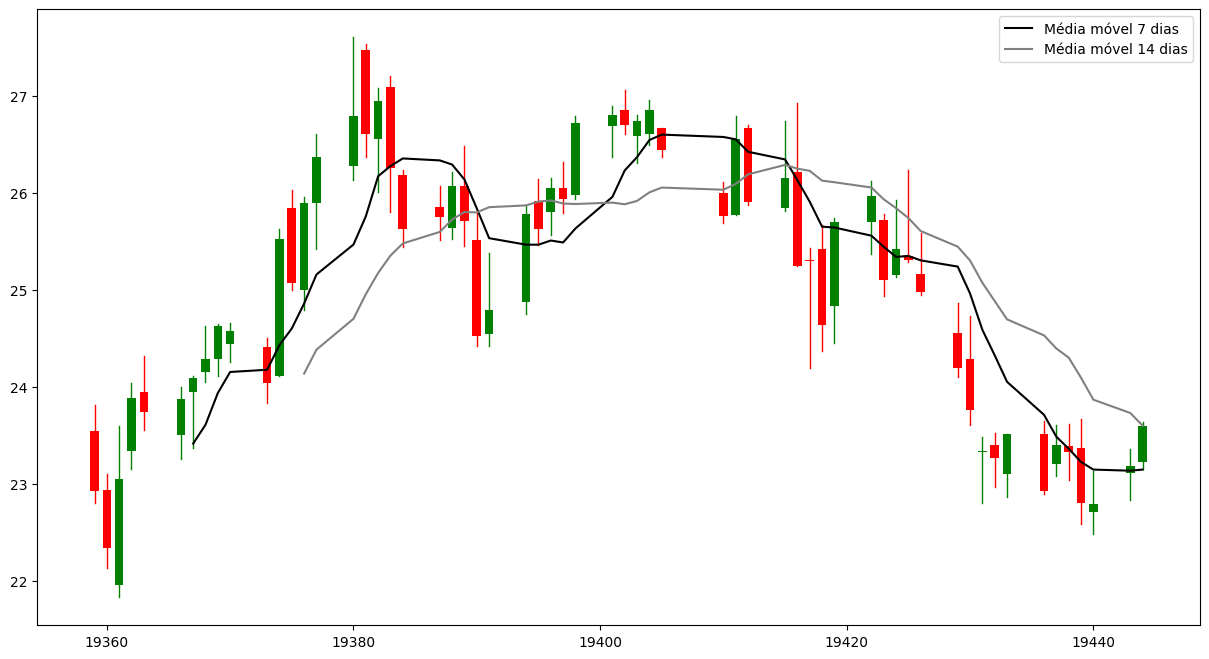

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))
width = 0.7

for i in range(len(df)):
    if df['Fech'].iloc[i] > df['Aber'].iloc[i]:
        color = 'green'
    else:
        color = 'red'


    ax.plot([df['Data'].iloc[i], df['Data'].iloc[i]],
            [df['Min'].iloc[i], df['Max'].iloc[i]],
            color=color,
            linewidth=1)

    ax.add_patch(plt.Rectangle((df['Data'].iloc[i] - width/2, min(df['Aber'].iloc[i],df['Fech'].iloc[i])),
                              width,
                              abs(df['Fech'].iloc[i] - df['Aber'].iloc[i]),
                              facecolor=color))

df['MA7'] = df['Fech'].rolling(window=7).mean()
df['MA14'] = df['Fech'].rolling(window=14).mean()
ax.plot(df['Data'], df['MA7'], color='black', label='Média móvel 7 dias')
ax.plot(df['Data'], df['MA14'], color='grey', label='Média móvel 14 dias')
ax.legend()

### Plotly candle e volume interativo

In [ ]:
fig = make_subplots(rows=2,cols=1,shared_xaxes=True,
                    vertical_spacing=0.1,
                    subplot_titles=('Candlesticks','Volume transacionado'),
                    row_width=[0.2,0.7])

fig.add_trace(go.Candlestick(x=df.index,
                             open=df['Aber'],
                             high=df['Max'],
                             low=df['Min'],
                             close=df['Fech'],
                             name='Candlestick'),
                             row=1, col=1)

fig.add_trace(go.Scatter(x=df.index,
                         y=df['MA7'],
                         mode='lines',
                         name='Média móvel 7 dias',
                         marker=dict(color='black')),
                         row=1, col=1)

fig.add_trace(go.Scatter(x=df.index,
                         y=df['MA14'],
                         mode='lines',
                         name='Média móvel 14 dias',
                         marker=dict(color='grey')),
                         row=1, col=1)

fig.add_trace(go.Bar(x=df.index,
                    y=df['Volume'],
                    name='Volume'),
                    row=2, col=1)

fig.update_layout(yaxis_title='Preço',
                  xaxis_rangeslider_visible=False,
                  width=1100, height=600)

fig.show()

### Mplfinance candle e volume

[*********************100%%**********************]  1 of 1 completed


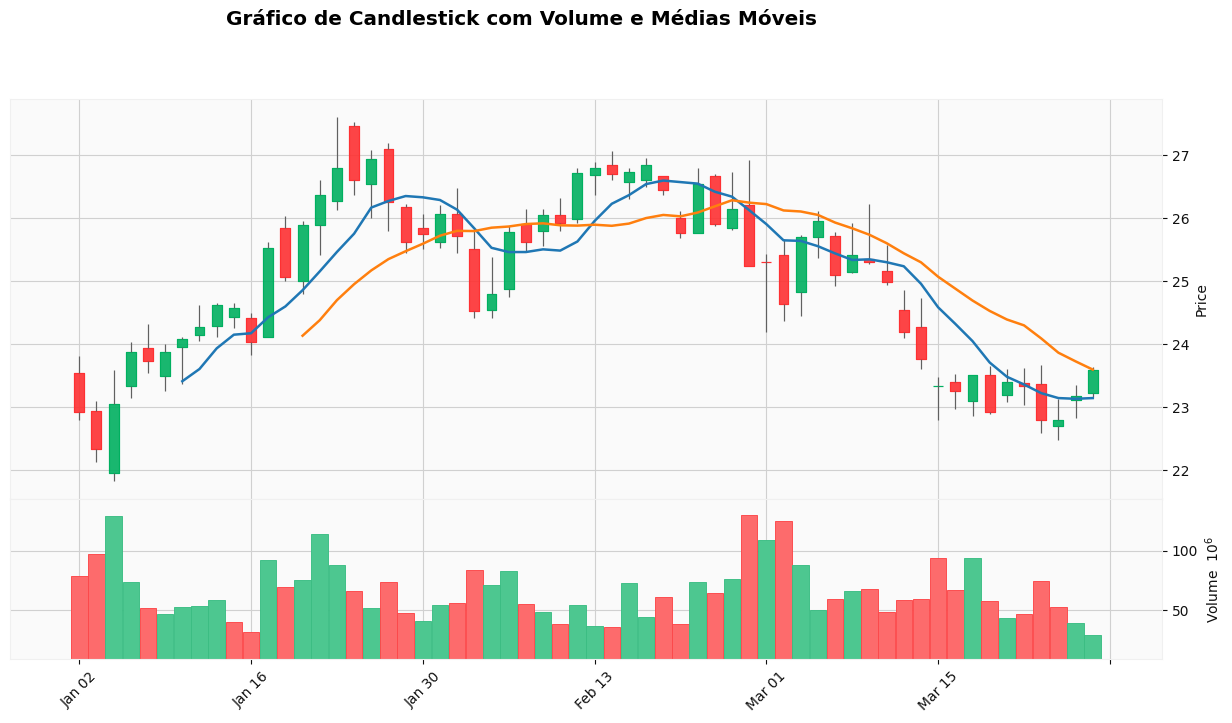

In [ ]:
dados = yf.download('PETR4.SA',start='2023-01-01', end='2023-12-31')
mpf.plot(dados.head(60),type='candle',figsize=(16,8),volume=True, mav=(7,14),style='yahoo', title='Gráfico de Candlestick com Volume e Médias Móveis')

## AAPL (Desafio)

In [ ]:
dados2 = yf.download('AAPL',start='2023-01-01', end='2023-12-31')
dados2

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,130.279999,130.899994,124.169998,125.070000,124.216301,112117500
2023-01-04,126.889999,128.660004,125.080002,126.360001,125.497498,89113600
2023-01-05,127.129997,127.769997,124.760002,125.019997,124.166641,80962700
2023-01-06,126.010002,130.289993,124.889999,129.619995,128.735245,87754700
2023-01-09,130.470001,133.410004,129.889999,130.149994,129.261612,70790800
...,...,...,...,...,...,...
2023-12-22,195.179993,195.410004,192.970001,193.600006,193.353287,37122800
2023-12-26,193.610001,193.889999,192.830002,193.050003,192.803986,28919300
2023-12-27,192.490005,193.500000,191.089996,193.149994,192.903839,48087700


### Matplotlib linhas

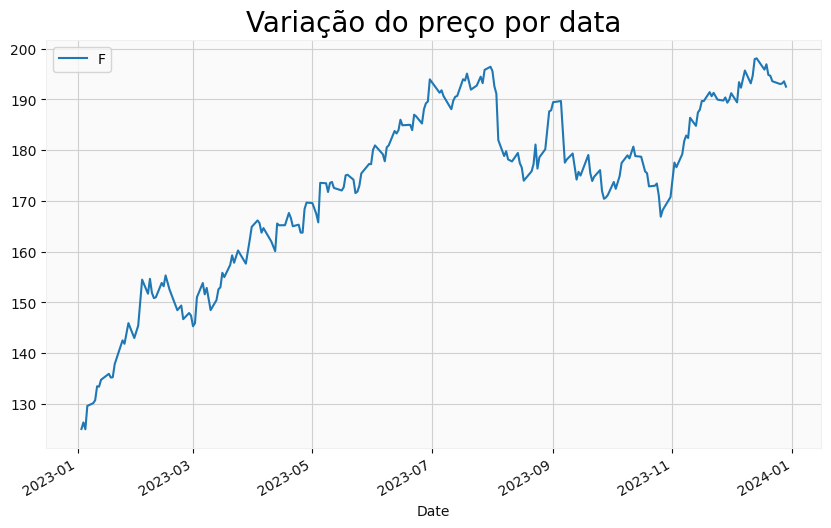

In [ ]:
dados2['Close'].plot(figsize=(10,6))
plt.title('Variação do preço por data', fontsize=20)
plt.legend('Fechamento')

In [ ]:
df2=dados2.head(60).copy()
df2['Date'] = df2.index
df2['Date'] = df2['Date'].apply(mdates.date2num)
df2.head(5)

,Open,High,Low,Close,Adj Close,Volume,Date
Date,,,,,,,
2023-01-03,130.279999,130.899994,124.169998,125.070000,124.216301,112117500,19360.0
2023-01-04,126.889999,128.660004,125.080002,126.360001,125.497498,89113600,19361.0
2023-01-05,127.129997,127.769997,124.760002,125.019997,124.166641,80962700,19362.0
2023-01-06,126.010002,130.289993,124.889999,129.619995,128.735245,87754700,19363.0
2023-01-09,130.470001,133.410004,129.889999,130.149994,129.261612,70790800,19366.0


### Matplotlib candles

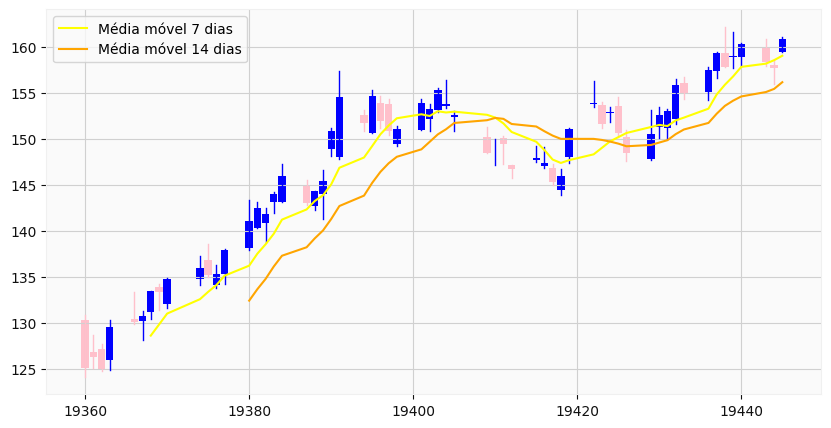

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
width = 0.9

for i in range(len(df2)):
    if df2['Close'].iloc[i] > df2['Open'].iloc[i]:
        color = 'blue'
    else:
        color = 'pink'

    ax.plot([df2['Date'].iloc[i], df2['Date'].iloc[i]],
            [df2['Low'].iloc[i], df2['High'].iloc[i]],
            color=color,
            linewidth=1)

    ax.add_patch(plt.Rectangle((df2['Date'].iloc[i] - width/2, min(df2['Open'].iloc[i],df2['Close'].iloc[i])),
                              width,
                              abs(df2['Close'].iloc[i] - df2['Open'].iloc[i]),
                              facecolor=color))

df2['MA7'] = df2['Close'].rolling(window=7).mean()
df2['MA14'] = df2['Close'].rolling(window=14).mean()
ax.plot(df2['Date'], df2['MA7'], color='yellow', label='Média móvel 7 dias')
ax.plot(df2['Date'], df2['MA14'], color='orange', label='Média móvel 14 dias')
ax.legend()

### Plotly candle e volume interativo

In [ ]:
fig = make_subplots(rows=2,cols=1,shared_xaxes=True,
                    vertical_spacing=0.1,
                    subplot_titles=('Candlesticks','Volume transacionado'),
                    row_width=[0.2,0.7])

fig.add_trace(go.Candlestick(x=df2.index,
                             open=df2['Open'],
                             high=df2['High'],
                             low=df2['Low'],
                             close=df2['Close'],
                             name='Candlestick'),
                             row=1, col=1)

fig.add_trace(go.Scatter(x=df2.index,
                         y=df2['MA7'],
                         mode='lines',
                         name='Média móvel 7 dias',
                         marker=dict(color='yellow')),
                         row=1, col=1)

fig.add_trace(go.Scatter(x=df2.index,
                         y=df2['MA14'],
                         mode='lines',
                         name='Média móvel 14 dias',
                         marker=dict(color='orange')),
                         row=1, col=1)

fig.add_trace(go.Bar(x=df2.index,
                    y=df2['Volume'],
                    name='Volume'),
                    row=2, col=1)

fig.update_layout(yaxis_title='Preço',
                  xaxis_rangeslider_visible=False,
                  width=1100, height=600)

fig.show()

### Mplfinance candle e volume

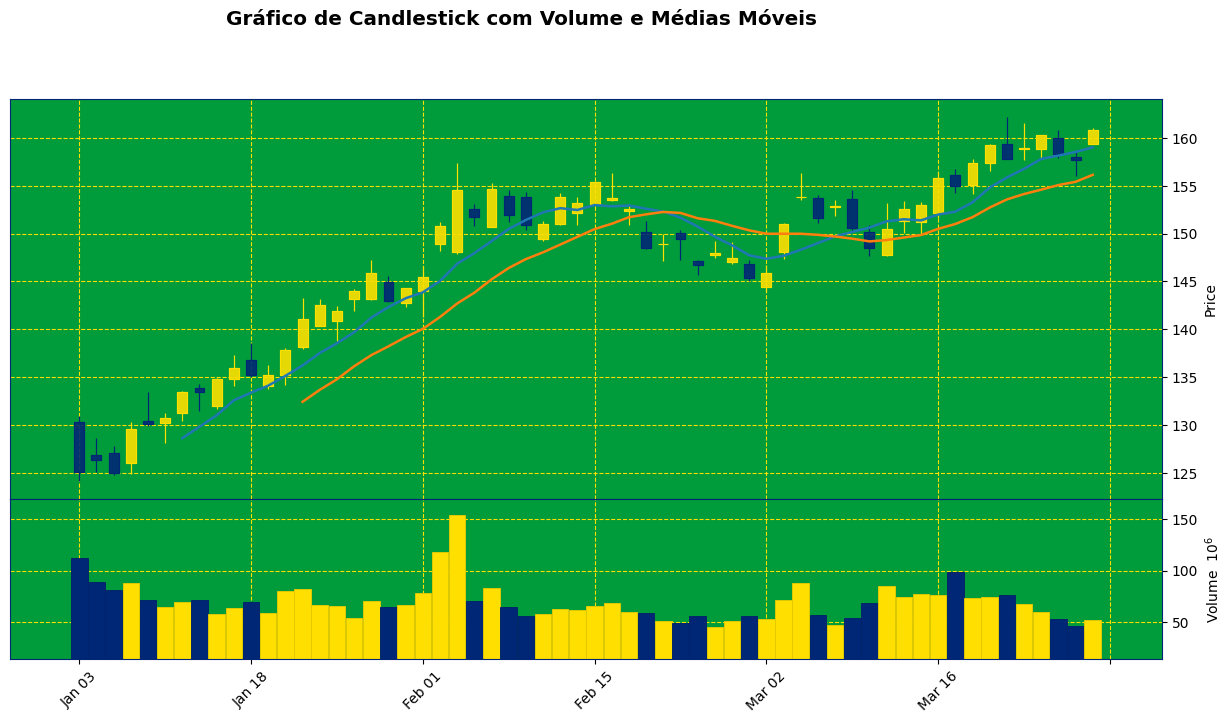

In [ ]:
mpf.plot(dados2.head(60),type='candle',figsize=(16,8),volume=True, mav=(7,14),style='brasil', title='Gráfico de Candlestick com Volume e Médias Móveis')